<a href="https://colab.research.google.com/github/krishnamittal01/data-science/blob/main/1st_ml_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv("/content/placement.csv")

In [ ]:
data.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [ ]:
data.iloc[:,1:]

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [ ]:
import matplotlib.pyplot as plt

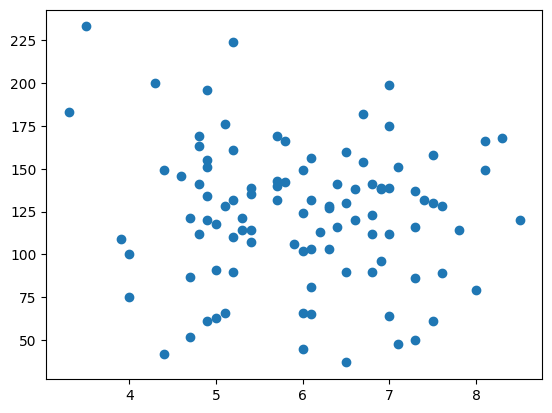

In [ ]:
plt.scatter(data["cgpa"],data["iq"])

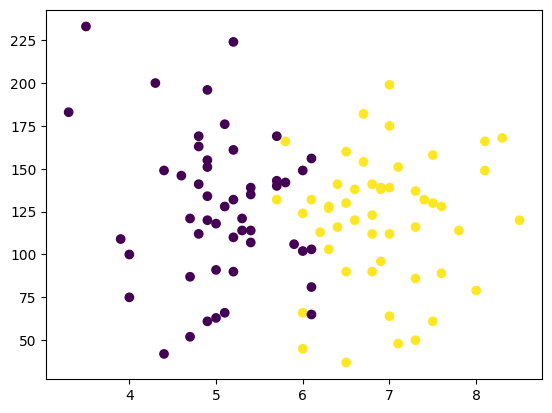

In [ ]:
x_label=data["cgpa"]
y_label=data["iq"]
plt.scatter(x_label,y_label,c=data["placement"])
plt.show()

In [ ]:
#logistic regression
X=data.iloc[:,1:3]
Y=data.iloc[:,3]
print(X,Y)

    cgpa     iq
0    6.8  123.0
1    5.9  106.0
2    5.3  121.0
3    7.4  132.0
4    5.8  142.0
..   ...    ...
95   4.3  200.0
96   4.4   42.0
97   6.7  182.0
98   6.3  103.0
99   6.2  113.0

[100 rows x 2 columns] 0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [ ]:
X_train

,cgpa,iq
67,5.0,118.0
81,5.4,107.0
45,6.0,66.0
5,7.1,48.0
70,6.3,127.0
...,...,...
43,6.8,141.0
9,5.1,66.0
23,4.7,87.0
97,6.7,182.0


In [ ]:
Y_train

,placement
67,0
81,0
45,1
5,1
70,1
...,...
43,1
9,0
23,0
97,1


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)
X_train


array([[-0.86612911, -0.09722824],
       [-0.51539066, -0.37146175],
       [ 0.01071701, -1.3936048 ],
       [ 0.97524774, -1.84235053],
       [ 0.27377084,  0.12714462],
       [-1.04149834,  1.174218  ],
       [ 1.4136708 ,  0.15207494],
       [-0.16465222,  1.09942704],
       [-0.69075989,  0.25179622],
       [ 0.79987852, -0.64569525],
       [ 0.44914007, -0.79527716],
       [ 0.88756313,  1.32379991],
       [ 0.01071701,  0.67561163],
       [ 0.36145546,  0.47616908],
       [-1.39223678, -1.99193244],
       [ 0.01071701,  0.05235367],
       [-0.25233683,  0.45123876],
       [-0.25233683,  0.52602972],
       [ 0.09840162,  0.85012386],
       [-1.39223678,  0.67561163],
       [-0.51539066,  0.42630845],
       [-1.04149834,  0.47616908],
       [ 0.44914007, -2.11658404],
       [-1.74297523, -0.54597397],
       [ 0.44914007,  0.94984513],
       [ 1.23830158,  0.25179622],
       [-0.95381372, -1.51825639],
       [-2.35676751,  1.52324246],
       [-1.12918295,

In [ ]:
X_test=scaler.fit_transform(X_test)

In [ ]:
X_test

array([[ 0.87949874, -2.29308385],
       [ 0.61026443,  0.46966778],
       [ 2.04618075,  0.89942914],
       [ 0.78975397,  0.00920917],
       [-0.10769372, -1.00379976],
       [-0.73590711,  0.68454846],
       [-0.28718326,  0.93012638],
       [-1.00514142,  0.37757606],
       [-1.09488619,  0.74594294],
       [-1.09488619, -0.81961631]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf=LogisticRegression()

In [ ]:
#model training
clf.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
Y_pred=clf.predict(X_test)

In [ ]:
Y_test

,placement
64,1
74,1
53,1
60,1
1,0
47,0
84,0
89,0
34,0
59,0


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test,Y_pred)

1.0

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

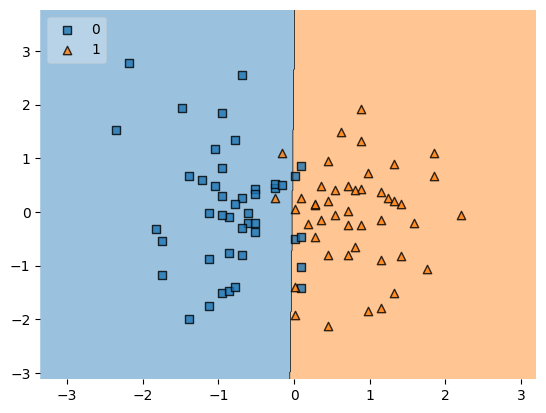

In [ ]:
plot_decision_regions(X_train,Y_train.values,clf=clf,legend=2)

In [ ]:
import pickle


In [ ]:
pickle.dump(clf,open("model.pkl","wb"))